<a href="https://colab.research.google.com/github/Colsai/DATA-601-Wan/blob/main/Project_1_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chicago Public Schools: 
# DATA601 | Wan  
---   
An Exploratory Look at Chicago's Educational System, through the public dataset of all of their schools.

In [ ]:
# Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

STEP 1: Project Proposal:
Project Proposal for EDA: "Chicago Public Schools: College Scorecard"
Dataset is free, and publically acessible.

**Data Information:**  
I have chosen the dataset: https://data.cityofchicago.org/Education/Chicago-Public-Schools-School-Progress-Reports-SY1/dw27-rash

**Data Name:** "Chicago Public Schools - School Progress Reports SY1819"

| Information | Description |
|------|-------|
| Source | Provided by Chicago Public Schools  |
| Last Updated | November 7, 2019   |
| Size | 1.8mb  |
| Rows | 654 |
| Columns  | 182 |

Basic information on Chicago Public Schools at https://www.cps.edu/

## About the Dataset:  
The dataset I will focus on looks at the progress metrics of over 600 schools in the Chicago Public School system for the school year from *2018-2019*. This is a useful dataset because, although it is specific in scope (only focusing on the Chicago Public School system), it includes a larger list of many different metrics that are helpful for review. Larger national datasets often lack the number of metrics that this scorecard has, such as individual average scores for tests. When I had previously looked through Maryland's public data for schools, it was difficult to find reporting of NWEA and NAEP scores, for example.

Additionally, future comparisons to this data will be very important. Recent developments in the Chicago Public School system have included changes, such as reallocating funding away from ties to local police departments, as well as possible educational losses and issues caused by the Covid-19 pandemic.

This dataset is pretty clean, overall, too.

### Background: 
In the words of Malcolm X, “Education is our passport to the future, for tomorrow belongs to the people who prepare for it today.” As a country, the United States places great importance on maintaining and improving its educational system. The National Center for Educational Statistics (NCES) reported that, in 2016, the United States spent 5th most per student in the world (1). However, our educational system has undergone a dramatic change since public schools have been forced to adopt alternative and hybrid models. The Chicago public school system has reopened after a year of at-home education.

Prior to this dramatic change, the Chicago Public School system has played a dramatic and vital community role for many families in Illinois. With a student body around 400,000, and employing over 21,000 teachers and 37,000 staff members, the Chicago Public Schools are very important role for the future (2). It is additionally a large cost burder on the taxpayer in the city of Chicago, with the upcoming school plan budgeting for over $8 billion in expenditures.

### Focus: 
My general question for focus is: "is education fair in the Chicago Public School system?". How much of a disparity do we see between the best and worst schools? Does every student have a chance at a decent education in Chicago?

I intend to look at performance metrics, such as graduation rate, NWEA test scores, PSAT/SAT scores, and attendance rates to look at disparities in educational attainment for students- is there a big difference between the best schools and the worst? What are some of the largest disparities in education? Do magnet schools have vastly better performance metrics than other schools?

https://nces.ed.gov/programs/coe/indicator_cmd.asp#:~:text=Norway%20reported%20the%20highest%20total,United%20States%20(6.0%20percent).
https://en.wikipedia.org/wiki/Chicago_Public_Schools

## Project 2: Exploratory EDA
Visualizations, Data look, etc.

In [ ]:
#I'll call the dataset
df = pd.read_csv("https://data.cityofchicago.org/api/views/dw27-rash/rows.csv?accessType=DOWNLOAD&bom=true&format=true")

In [ ]:
#Custom display the elements
def show_all(input_list, line_len = 3):
    num_in_line = 0

    for elem in input_list:
        if num_in_line > line_len - 1:
            print(f"")
            print(elem, end = ', ')
            num_in_line = 0
        
        else:
            print(elem, end = ', ')
        
        num_in_line += 1

## I. Introducing the data:
Let's just look at the beginning, end, and sample of the data first.

In [ ]:
#Top of the data
df.head(5)

,School_ID,Short_Name,Long_Name,School_Type,Primary_Category,Address,City,State,Zip,Phone,Fax,CPS_School_Profile,Website,Progress_Report_Year,Blue_Ribbon_Award_Year,Excelerate_Award_Gold_Year,Spot_Light_Award_Year,Improvement_Award_Year,Excellence_Award_Year,Student_Growth_Rating,Student_Growth_Description,Growth_Reading_Grades_Tested_Pct_ES,Growth_Reading_Grades_Tested_Label_ES,Growth_Math_Grades_Tested_Pct_ES,Growth_Math_Grades_Tested_Label_ES,Student_Attainment_Rating,Student_Attainment_Description,Attainment_Reading_Pct_ES,Attainment_Reading_Lbl_ES,Attainment_Math_Pct_ES,Attainment_Math_Lbl_ES,Culture_Climate_Rating,Culture_Climate_Description,School_Survey_Student_Response_Rate_Pct,School_Survey_Student_Response_Rate_Avg_Pct,School_Survey_Teacher_Response_Rate_Pct,School_Survey_Teacher_Response_Rate_Avg_Pct,School_Survey_Parent_Response_Rate_Pct,School_Survey_Parent_Response_Rate_Avg_Pct,Healthy_School_Certification,...,College_Persistence_School_Pct_Year_2,College_Persistence_CPS_Pct_Year_2,College_Persistence_School_Pct_Year_1,College_Persistence_CPS_Pct_Year_1,Progress_Toward_Graduation_Year_1,Progress_Toward_Graduation_Year_2,State_School_Report_Card_URL,Mobility_Rate_Pct,Chronic_Truancy_Pct,Empty_Progress_Report_Message,School_Survey_Rating_Description,Supportive_School_Award,Supportive_School_Award_Desc,Parent_Survey_Results_Year,School_Latitude,School_Longitude,PSAT_Grade_9_Score_School_Avg,PSAT_Grade_10_Score_School_Avg,SAT_Grade_11_Score_School_Avg,SAT_Grade_11_Score_CPS_Avg,Growth_PSAT_Grade_9_School_Pct,Growth_PSAT_Grade_9_School_Lbl,Growth_PSAT_Reading_Grade_10_School_Pct,Growth_PSAT_Reading_Grade_10_School_Lbl,Growth_SAT_Grade_11_School_Pct,Growth_SAT_Grade_11_School_Lbl,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_9_School_Lbl,Attainment_PSAT_Grade_10_School_Pct,Attainment_PSAT_Grade_10_School_Lbl,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Lbl,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Reading_Grade_11_School_Lbl,Growth_SAT_Math_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Lbl
0,"609,710",HARLAN HS,John M Harlan Community Academy High School,Neighborhood,HS,9652 S MICHIGAN AVE,Chicago,Illinois,"60,628","7,735,355,400","7,735,355,061",http://cps.edu/Schools/Pages/school.aspx?Schoo...,https://www.harlanfalcons.org,"2,018",NaN,NaN,NaN,NaN,NaN,BELOW AVERAGE,Student Growth measures the change in standard...,NaN,NaN,NaN,NaN,FAR BELOW EXPECTATIONS,Student Attainment measures how well the schoo...,NaN,NaN,NaN,NaN,PARTIALLY ORGANIZED,Results are based on student and teacher respo...,76.6,81.4,80.0,79.9,41%,35.6,Not Achieved,...,45.5,72.3,56.9,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,33.9,89.4,NaN,This school is “Partially Organized for Improv...,EMERGING,This school has developed an action plan to su...,"2,018",41.718372,-87.620623,701,733,824,969.0,2.0,2nd,32.0,32nd,9.0,9th,8.3,8.3,4.8,4.8,5.6,5.6,6.2,6.2,7.0,7th,50.0,50th,50.0,50th
1,"610,059",MAYER,Oscar Mayer Magnet School,Magnet,ES,2250 N CLIFTON AVE,Chicago,Illinois,"60,614","7,735,345,535","7,735,345,777",http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://mayermagnet.org/,"2,018",NaN,NaN,NaN,"2,013",NaN,AVERAGE,Student Growth measures the change in standard...,58.0,58th,47.0,47th,FAR ABOVE AVERAGE,Student Attainment measures how well the schoo...,96.0,96th,91.0,91st,WELL ORGANIZED,Results are based on student and teacher respo...,98.9,81.4,79.1,79.9,> 75%,35.6,Not Achieved,...,NaN,72.3,NaN,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,3.8,22.9,NaN,This school is “Well-Organized for Improvement...,EMERGING,This school has developed an action plan to su...,"2,018",41.923204,-87.657287,NaN,NaN,NaN,969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"610,334",RABY HS,Al Raby High Sch

In [ ]:
#End of the data
df.tail()

,School_ID,Short_Name,Long_Name,School_Type,Primary_Category,Address,City,State,Zip,Phone,Fax,CPS_School_Profile,Website,Progress_Report_Year,Blue_Ribbon_Award_Year,Excelerate_Award_Gold_Year,Spot_Light_Award_Year,Improvement_Award_Year,Excellence_Award_Year,Student_Growth_Rating,Student_Growth_Description,Growth_Reading_Grades_Tested_Pct_ES,Growth_Reading_Grades_Tested_Label_ES,Growth_Math_Grades_Tested_Pct_ES,Growth_Math_Grades_Tested_Label_ES,Student_Attainment_Rating,Student_Attainment_Description,Attainment_Reading_Pct_ES,Attainment_Reading_Lbl_ES,Attainment_Math_Pct_ES,Attainment_Math_Lbl_ES,Culture_Climate_Rating,Culture_Climate_Description,School_Survey_Student_Response_Rate_Pct,School_Survey_Student_Response_Rate_Avg_Pct,School_Survey_Teacher_Response_Rate_Pct,School_Survey_Teacher_Response_Rate_Avg_Pct,School_Survey_Parent_Response_Rate_Pct,School_Survey_Parent_Response_Rate_Avg_Pct,Healthy_School_Certification,...,College_Persistence_School_Pct_Year_2,College_Persistence_CPS_Pct_Year_2,College_Persistence_School_Pct_Year_1,College_Persistence_CPS_Pct_Year_1,Progress_Toward_Graduation_Year_1,Progress_Toward_Graduation_Year_2,State_School_Report_Card_URL,Mobility_Rate_Pct,Chronic_Truancy_Pct,Empty_Progress_Report_Message,School_Survey_Rating_Description,Supportive_School_Award,Supportive_School_Award_Desc,Parent_Survey_Results_Year,School_Latitude,School_Longitude,PSAT_Grade_9_Score_School_Avg,PSAT_Grade_10_Score_School_Avg,SAT_Grade_11_Score_School_Avg,SAT_Grade_11_Score_CPS_Avg,Growth_PSAT_Grade_9_School_Pct,Growth_PSAT_Grade_9_School_Lbl,Growth_PSAT_Reading_Grade_10_School_Pct,Growth_PSAT_Reading_Grade_10_School_Lbl,Growth_SAT_Grade_11_School_Pct,Growth_SAT_Grade_11_School_Lbl,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_9_School_Lbl,Attainment_PSAT_Grade_10_School_Pct,Attainment_PSAT_Grade_10_School_Lbl,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Lbl,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Reading_Grade_11_School_Lbl,Growth_SAT_Math_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Lbl
649,"610,125",RUIZ,Irma C Ruiz Elementary School,Neighborhood,ES,2410 S LEAVITT ST,Chicago,Illinois,"60,608","7,735,354,825","7,735,354,618",http://cps.edu/Schools/Pages/school.aspx?Schoo...,https://ruizelementaryschool.org,"2,018",NaN,2018.0,NaN,NaN,NaN,FAR ABOVE AVERAGE,Student Growth measures the change in standard...,91.0,91st,91.0,91st,AVERAGE,Student Attainment measures how well the schoo...,57.0,57th,56.0,56th,WELL ORGANIZED,Results are based on student and teacher respo...,97.9,81.4,87.7,79.9,< 30%,35.6,Not Achieved,...,NaN,72.3,NaN,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,8.1,7.8,NaN,This school is “Well-Organized for Improvement...,EMERGING,This school has developed an action plan to su...,"2,018",41.848101,-87.680745,NaN,NaN,NaN,969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,"610,219",WASHINGTON G ES,George Washington Elementary School,Neighborhood,ES,3611 E 114TH ST,Chicago,Illinois,"60,617","7,735,355,010","7,735,355,124",http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://gwashington.cps.edu/,"2,018",NaN,2018.0,"2,012",NaN,NaN,AVERAGE,Student Growth measures the change in standard...,42.0,42nd,30.0,30th,AVERAGE,Student Attainment measures how well the schoo...,67.0,67th,63.0,63rd,WELL ORGANIZED,Results are based on student and teacher respo...,86.8,81.4,81.8,79.9,55%,35.6,Not Achieved,...,NaN,72.3,NaN,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,4.7,5.2,NaN,This school is “Well-Organized for Improvement...,EMERGING,This school has developed an action plan to su...,"2,018",41.688131,-87.536015,NaN,NaN,NaN,969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
651,"610,146",REVERE,Paul Revere Elementary Sc

In [ ]:
df.sample(3)

,School_ID,Short_Name,Long_Name,School_Type,Primary_Category,Address,City,State,Zip,Phone,Fax,CPS_School_Profile,Website,Progress_Report_Year,Blue_Ribbon_Award_Year,Excelerate_Award_Gold_Year,Spot_Light_Award_Year,Improvement_Award_Year,Excellence_Award_Year,Student_Growth_Rating,Student_Growth_Description,Growth_Reading_Grades_Tested_Pct_ES,Growth_Reading_Grades_Tested_Label_ES,Growth_Math_Grades_Tested_Pct_ES,Growth_Math_Grades_Tested_Label_ES,Student_Attainment_Rating,Student_Attainment_Description,Attainment_Reading_Pct_ES,Attainment_Reading_Lbl_ES,Attainment_Math_Pct_ES,Attainment_Math_Lbl_ES,Culture_Climate_Rating,Culture_Climate_Description,School_Survey_Student_Response_Rate_Pct,School_Survey_Student_Response_Rate_Avg_Pct,School_Survey_Teacher_Response_Rate_Pct,School_Survey_Teacher_Response_Rate_Avg_Pct,School_Survey_Parent_Response_Rate_Pct,School_Survey_Parent_Response_Rate_Avg_Pct,Healthy_School_Certification,...,College_Persistence_School_Pct_Year_2,College_Persistence_CPS_Pct_Year_2,College_Persistence_School_Pct_Year_1,College_Persistence_CPS_Pct_Year_1,Progress_Toward_Graduation_Year_1,Progress_Toward_Graduation_Year_2,State_School_Report_Card_URL,Mobility_Rate_Pct,Chronic_Truancy_Pct,Empty_Progress_Report_Message,School_Survey_Rating_Description,Supportive_School_Award,Supportive_School_Award_Desc,Parent_Survey_Results_Year,School_Latitude,School_Longitude,PSAT_Grade_9_Score_School_Avg,PSAT_Grade_10_Score_School_Avg,SAT_Grade_11_Score_School_Avg,SAT_Grade_11_Score_CPS_Avg,Growth_PSAT_Grade_9_School_Pct,Growth_PSAT_Grade_9_School_Lbl,Growth_PSAT_Reading_Grade_10_School_Pct,Growth_PSAT_Reading_Grade_10_School_Lbl,Growth_SAT_Grade_11_School_Pct,Growth_SAT_Grade_11_School_Lbl,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_9_School_Lbl,Attainment_PSAT_Grade_10_School_Pct,Attainment_PSAT_Grade_10_School_Lbl,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Lbl,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Reading_Grade_11_School_Lbl,Growth_SAT_Math_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Lbl
52,"610,586",SADLOWSKI,Edward E. Sadlowski Elementary School,Neighborhood,ES,3930 E 105TH,Chicago,Illinois,"60,617","7,735,358,040","7,735,358,020",http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://sadlowski.cps.edu,"2,018",NaN,2018.0,NaN,NaN,NaN,AVERAGE,Student Growth measures the change in standard...,52.0,52nd,69.0,69th,AVERAGE,Student Attainment measures how well the schoo...,55.0,55th,47.0,47th,WELL ORGANIZED,Results are based on student and teacher respo...,99.2,81.4,97.2,79.9,> 75%,35.6,Not Achieved,...,NaN,72.3,NaN,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,6.7,21.3,NaN,This school is “Well-Organized for Improvement...,EMERGING,This school has developed an action plan to su...,"2,018",41.704859,-87.527985,NaN,NaN,NaN,969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,"609,865",JORDAN,Jordan Elementary Community School,Neighborhood,ES,7414 N WOLCOTT AVE,Chicago,Illinois,"60,626","7,735,342,220","7,735,342,231",http://cps.edu/Schools/Pages/school.aspx?Schoo...,https://jordan.cps.edu,"2,018",NaN,2018.0,NaN,NaN,NaN,FAR ABOVE AVERAGE,Student Growth measures the change in standard...,95.0,95th,88.0,88th,AVERAGE,Student Attainment measures how well the schoo...,57.0,57th,52.0,52nd,PARTIALLY ORGANIZED,Results are based on student and teacher respo...,97.8,81.4,90.7,79.9,45%,35.6,Not Achieved,...,NaN,72.3,NaN,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,17.7,29.2,NaN,This school is “Partially Organized for Improv...,EXEMPLARY,This school has a strong commitment and robust...,"2,018",42.017088,-87.677763,NaN,NaN,NaN,969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,"609,780",MARINE LEADERSHIP AT AMES HS,Marine Lead

In [ ]:
#How many schools are there in the dataset?
df.shape

(654, 182)

### And what are all of the columns in that data?

In [ ]:
#What columns do we have?
show_all(df.columns,6)

School_ID, Short_Name, Long_Name, School_Type, Primary_Category, Address, 
City, State, Zip, Phone, Fax, CPS_School_Profile, 
Website, Progress_Report_Year, Blue_Ribbon_Award_Year, Excelerate_Award_Gold_Year, Spot_Light_Award_Year, Improvement_Award_Year, 
Excellence_Award_Year, Student_Growth_Rating, Student_Growth_Description, Growth_Reading_Grades_Tested_Pct_ES, Growth_Reading_Grades_Tested_Label_ES, Growth_Math_Grades_Tested_Pct_ES, 
Growth_Math_Grades_Tested_Label_ES, Student_Attainment_Rating, Student_Attainment_Description, Attainment_Reading_Pct_ES, Attainment_Reading_Lbl_ES, Attainment_Math_Pct_ES, 
Attainment_Math_Lbl_ES, Culture_Climate_Rating, Culture_Climate_Description, School_Survey_Student_Response_Rate_Pct, School_Survey_Student_Response_Rate_Avg_Pct, School_Survey_Teacher_Response_Rate_Pct, 
School_Survey_Teacher_Response_Rate_Avg_Pct, School_Survey_Parent_Response_Rate_Pct, School_Survey_Parent_Response_Rate_Avg_Pct, Healthy_School_Certification, Healthy_School_Certi

There are a lot of different metrics and data points in this data.  
There is a heavy emphasis on NWEA scores.

In [ ]:
nwea_columns = [x for x in df.columns if 'NWEA' in x]
show_all(nwea_columns, 5)

NWEA_Reading_Growth_Grade_3_Pct, NWEA_Reading_Growth_Grade_3_Lbl, NWEA_Reading_Growth_Grade_4_Pct, NWEA_Reading_Growth_Grade_4_Lbl, NWEA_Reading_Growth_Grade_5_Pct, 
NWEA_Reading_Growth_Grade_5_Lbl, NWEA_Reading_Growth_Grade_6_Pct, NWEA_Reading_Growth_Grade_6_Lbl, NWEA_Reading_Growth_Grade_7_Pct, NWEA_Reading_Growth_Grade_7_Lbl, 
NWEA_Reading_Growth_Grade_8_Pct, NWEA_Reading_Growth_Grade_8_Lbl, NWEA_Math_Growth_Grade_3_Pct, NWEA_Math_Growth_Grade_3_Lbl, NWEA_Math_Growth_Grade_4_Pct, 
NWEA_Math_Growth_Grade_4_Lbl, NWEA_Math_Growth_Grade_5_Pct, NWEA_Math_Growth_Grade_5_Lbl, NWEA_Math_Growth_Grade_6_Pct, NWEA_Math_Growth_Grade_6_Lbl, 
NWEA_Math_Growth_Grade_7_Pct, NWEA_Math_Growth_Grade_7_Lbl, NWEA_Math_Growth_Grade_8_Pct, NWEA_Math_Growth_Grade_8_Lbl, NWEA_Reading_Attainment_Grade_2_Pct, 
NWEA_Reading_Attainment_Grade_2_Lbl, NWEA_Reading_Attainment_Grade_3_Pct, NWEA_Reading_Attainment_Grade_3_Lbl, NWEA_Reading_Attainment_Grade_4_Pct, NWEA_Reading_Attainment_Grade_4_Lbl, 
NWEA_Reading_Att

In [ ]:
nwea_columns = [x for x in df.columns if 'NWEA' not in x]
show_all(nwea_columns, 5)

School_ID, Short_Name, Long_Name, School_Type, Primary_Category, 
Address, City, State, Zip, Phone, 
Fax, CPS_School_Profile, Website, Progress_Report_Year, Blue_Ribbon_Award_Year, 
Excelerate_Award_Gold_Year, Spot_Light_Award_Year, Improvement_Award_Year, Excellence_Award_Year, Student_Growth_Rating, 
Student_Growth_Description, Growth_Reading_Grades_Tested_Pct_ES, Growth_Reading_Grades_Tested_Label_ES, Growth_Math_Grades_Tested_Pct_ES, Growth_Math_Grades_Tested_Label_ES, 
Student_Attainment_Rating, Student_Attainment_Description, Attainment_Reading_Pct_ES, Attainment_Reading_Lbl_ES, Attainment_Math_Pct_ES, 
Attainment_Math_Lbl_ES, Culture_Climate_Rating, Culture_Climate_Description, School_Survey_Student_Response_Rate_Pct, School_Survey_Student_Response_Rate_Avg_Pct, 
School_Survey_Teacher_Response_Rate_Pct, School_Survey_Teacher_Response_Rate_Avg_Pct, School_Survey_Parent_Response_Rate_Pct, School_Survey_Parent_Response_Rate_Avg_Pct, Healthy_School_Certification, 
Healthy_School_Cer

In [ ]:
len(nwea_columns) / len(df.columns) #Almost 30% of the data is devoted to NWEA!

0.2857142857142857

In [ ]:
#And describing some of the data (what are some things we can look at?)
df.describe()

,Blue_Ribbon_Award_Year,Excelerate_Award_Gold_Year,Excellence_Award_Year,Growth_Reading_Grades_Tested_Pct_ES,Growth_Math_Grades_Tested_Pct_ES,Attainment_Reading_Pct_ES,Attainment_Math_Pct_ES,School_Survey_Student_Response_Rate_Pct,School_Survey_Student_Response_Rate_Avg_Pct,School_Survey_Teacher_Response_Rate_Pct,School_Survey_Teacher_Response_Rate_Avg_Pct,School_Survey_Parent_Response_Rate_Avg_Pct,NWEA_Reading_Growth_Grade_3_Pct,NWEA_Reading_Growth_Grade_4_Pct,NWEA_Reading_Growth_Grade_5_Pct,NWEA_Reading_Growth_Grade_6_Pct,NWEA_Reading_Growth_Grade_7_Pct,NWEA_Reading_Growth_Grade_8_Pct,NWEA_Math_Growth_Grade_3_Pct,NWEA_Math_Growth_Grade_4_Pct,NWEA_Math_Growth_Grade_5_Pct,NWEA_Math_Growth_Grade_6_Pct,NWEA_Math_Growth_Grade_7_Pct,NWEA_Math_Growth_Grade_8_Pct,NWEA_Reading_Attainment_Grade_2_Pct,NWEA_Reading_Attainment_Grade_3_Pct,NWEA_Reading_Attainment_Grade_4_Pct,NWEA_Reading_Attainment_Grade_5_Pct,NWEA_Reading_Attainment_Grade_6_Pct,NWEA_Reading_Attainment_Grade_7_Pct,NWEA_Reading_Attainment_Grade_8_Pct,NWEA_Math_Attainment_Grade_2_Pct,NWEA_Math_Attainment_Grade_3_Pct,NWEA_Math_Attainment_Grade_4_Pct,NWEA_Math_Attainment_Grade_5_Pct,NWEA_Math_Attainment_Grade_6_Pct,NWEA_Math_Attainment_Grade_7_Pct,NWEA_Math_Attainment_Grade_8_Pct,Suspensions_Per_100_Students_Year_1_Pct,Suspensions_Per_100_Students_Year_2_Pct,...,One_Year_Dropout_Rate_Avg_Pct,Freshmen_On_Track_School_Pct_Year_2,Freshmen_On_Track_CPS_Pct_Year_2,Freshmen_On_Track_School_Pct_Year_1,Freshmen_On_Track_CPS_Pct_Year_1,Graduation_4_Year_School_Pct_Year_2,Graduation_4_Year_CPS_Pct_Year_2,Graduation_4_Year_School_Pct_Year_1,Graduation_4_Year_CPS_Pct_Year_1,Graduation_5_Year_School_Pct_Year_2,Graduation_5_Year_CPS_Pct_Year_2,Graduation_5_Year_School_Pct_Year_1,Graduation_5_Year_CPS_Pct_Year_1,College_Enrollment_School_Pct_Year_2,College_Enrollment_CPS_Pct_Year_2,College_Enrollment_School_Pct_Year_1,College_Enrollment_CPS_Pct_Year_1,College_Persistence_School_Pct_Year_2,College_Persistence_CPS_Pct_Year_2,College_Persistence_School_Pct_Year_1,College_Persistence_CPS_Pct_Year_1,Mobility_Rate_Pct,Chronic_Truancy_Pct,School_Latitude,School_Longitude,SAT_Grade_11_Score_CPS_Avg,Growth_PSAT_Grade_9_School_Pct,Growth_PSAT_Reading_Grade_10_School_Pct,Growth_SAT_Grade_11_School_Pct,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_9_School_Lbl,Attainment_PSAT_Grade_10_School_Pct,Attainment_PSAT_Grade_10_School_Lbl,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Pct
count,18.000000,352.0,30.000000,488.000000,488.000000,490.000000,490.000000,644.000000,6.500000e+02,644.000000,6.500000e+02,6.510000e+02,454.000000,452.000000,455.000000,450.000000,448.000000,447.000000,452.000000,452.000000,455.000000,450.000000,448.000000,447.000000,451.000000,456.000000,454.000000,455.000000,450.00000,448.000000,447.000000,452.000000,456.000000,454.000000,455.000000,450.000000,448.000000,447.000000,518.000000,516.000000,...,6.500000e+02,135.000000,6.500000e+02,134.000000,6.500000e+02,142.000000,6.500000e+02,136.000000,6.500000e+02,136.000000,6.500000e+02,121.000000,650.0,165.000000,6.500000e+02,155.000000,6.500000e+02,132.000000,6.500000e+02,125.000000,6.500000e+02,636.000000,621.000000,654.000000,654.000000,650.0,133.000000,132.000000,127.000000,135.000000,135.000000,135.000000,135.000000,164.000000,164.000000,169.000000,169.000000,132.000000,135.000000,135.000000
mean,2012.500000,2018.0,2012.400000,59.266393,58.120902,55.812245,51.612245,79.968634,8.140000e+01,81.080280,7.990000e+01,3.560000e+01,55.610132,44.621681,48.228571,63.871111,64.863839,60.903803,60.896018,48.774336,45.775824,42.315556,68.196429,68.914989,47.046563,51.820175,51.096916,48.019780,55.32000,65.285714,71.604027,44.090708,51.307018,48.911894,45.690110,45.413333,55.848214,65.185682,6.188996,5.184302,...,6.400000e+00,87.458519,8.9400

It looks like test performance data could be helpful to look at SAT and College Persistence Scores here.

## What kind of schools are included in the data?

In [ ]:
df['Primary_Category'].value_counts()

ES    470
HS    176
MS      8
Name: Primary_Category, dtype: int64

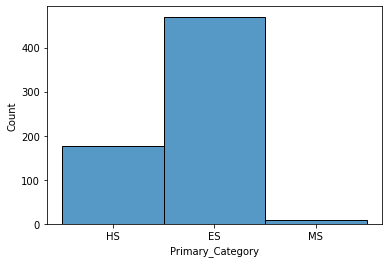

In [ ]:
#Let's graph a histplot of the schools, by type
sns.histplot(df, x = df['Primary_Category'])

Most of the schools are either labeled as elementary or high schools.  
There are very few Middle Schools in the data (only 8).

## Short look-thru of other data points
Let's just take a brief look at some of the other data points

In [ ]:
#How is Student Growth at the schools?
df['Student_Growth_Rating'].value_counts()

AVERAGE              268
ABOVE AVERAGE        189
BELOW AVERAGE         83
FAR ABOVE AVERAGE     57
NO DATA AVAILABLE     47
FAR BELOW AVERAGE      6
Name: Student_Growth_Rating, dtype: int64

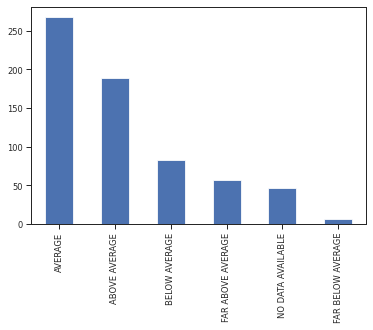

In [ ]:
df['Student_Growth_Rating'].value_counts().plot(kind = 'bar')

A lot of 'Average' Schools in terms of student growth. Makes sense.

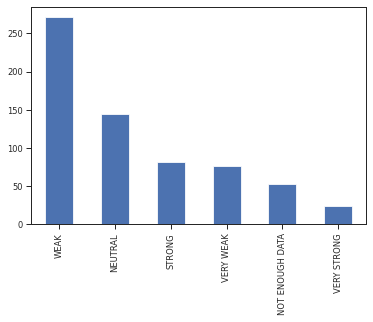

In [ ]:
df['School_Survey_Safety'].value_counts().plot(kind = 'bar')

School Safety Appears to mostly be schools that have 'weak' or 'neutral' safety scores.

## Let's focus solely on Chicago's High Schools Here.
- NWEA scores are helpful for looking at younger grades, but we will ignore them here.


I'll add a function here to look for the high schools in the data.  
Ref = From another project.

I'd like to explore few things:
- Graduation Rates
- Test and Proficiency Scores (SAT, etc.)
- Teacher Quality

In [ ]:
#String matches what you are looking for
def category_find(dataframe, column, name, exact=True):
    if exact == True:
        find_it = dataframe[dataframe[column].str.match(name, case=False)] 

    else:
        find_it = dataframe[dataframe[column].str.contains(name, case=False)] 
    return find_it

In [ ]:
#create a new dataframe called 'hs_df' for schools classified as 'hs' (high school).
hs_df = category_find(df, 'Primary_Category', 'HS')

In [ ]:
#What does the data look like?
hs_df.head()

,School_ID,Short_Name,Long_Name,School_Type,Primary_Category,Address,City,State,Zip,Phone,Fax,CPS_School_Profile,Website,Progress_Report_Year,Blue_Ribbon_Award_Year,Excelerate_Award_Gold_Year,Spot_Light_Award_Year,Improvement_Award_Year,Excellence_Award_Year,Student_Growth_Rating,Student_Growth_Description,Growth_Reading_Grades_Tested_Pct_ES,Growth_Reading_Grades_Tested_Label_ES,Growth_Math_Grades_Tested_Pct_ES,Growth_Math_Grades_Tested_Label_ES,Student_Attainment_Rating,Student_Attainment_Description,Attainment_Reading_Pct_ES,Attainment_Reading_Lbl_ES,Attainment_Math_Pct_ES,Attainment_Math_Lbl_ES,Culture_Climate_Rating,Culture_Climate_Description,School_Survey_Student_Response_Rate_Pct,School_Survey_Student_Response_Rate_Avg_Pct,School_Survey_Teacher_Response_Rate_Pct,School_Survey_Teacher_Response_Rate_Avg_Pct,School_Survey_Parent_Response_Rate_Pct,School_Survey_Parent_Response_Rate_Avg_Pct,Healthy_School_Certification,...,College_Persistence_School_Pct_Year_2,College_Persistence_CPS_Pct_Year_2,College_Persistence_School_Pct_Year_1,College_Persistence_CPS_Pct_Year_1,Progress_Toward_Graduation_Year_1,Progress_Toward_Graduation_Year_2,State_School_Report_Card_URL,Mobility_Rate_Pct,Chronic_Truancy_Pct,Empty_Progress_Report_Message,School_Survey_Rating_Description,Supportive_School_Award,Supportive_School_Award_Desc,Parent_Survey_Results_Year,School_Latitude,School_Longitude,PSAT_Grade_9_Score_School_Avg,PSAT_Grade_10_Score_School_Avg,SAT_Grade_11_Score_School_Avg,SAT_Grade_11_Score_CPS_Avg,Growth_PSAT_Grade_9_School_Pct,Growth_PSAT_Grade_9_School_Lbl,Growth_PSAT_Reading_Grade_10_School_Pct,Growth_PSAT_Reading_Grade_10_School_Lbl,Growth_SAT_Grade_11_School_Pct,Growth_SAT_Grade_11_School_Lbl,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_9_School_Lbl,Attainment_PSAT_Grade_10_School_Pct,Attainment_PSAT_Grade_10_School_Lbl,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Lbl,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Reading_Grade_11_School_Lbl,Growth_SAT_Math_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Lbl
0,"609,710",HARLAN HS,John M Harlan Community Academy High School,Neighborhood,HS,9652 S MICHIGAN AVE,Chicago,Illinois,"60,628","7,735,355,400","7,735,355,061",http://cps.edu/Schools/Pages/school.aspx?Schoo...,https://www.harlanfalcons.org,"2,018",NaN,NaN,NaN,NaN,NaN,BELOW AVERAGE,Student Growth measures the change in standard...,NaN,NaN,NaN,NaN,FAR BELOW EXPECTATIONS,Student Attainment measures how well the schoo...,NaN,NaN,NaN,NaN,PARTIALLY ORGANIZED,Results are based on student and teacher respo...,76.6,81.4,80.0,79.9,41%,35.6,Not Achieved,...,45.5,72.3,56.9,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,33.9,89.4,NaN,This school is “Partially Organized for Improv...,EMERGING,This school has developed an action plan to su...,"2,018",41.718372,-87.620623,701,733,824,969.0,2.0,2nd,32.0,32nd,9.0,9th,8.3,8.3,4.8,4.8,5.6,5.6,6.2,6.2,7.0,7th,50.0,50th,50.0,50th
2,"610,334",RABY HS,Al Raby High School,Small,HS,3545 W FULTON BLVD,Chicago,Illinois,"60,624","7,735,346,755","7,735,346,938",http://cps.edu/Schools/Pages/school.aspx?Schoo...,http://www.alraby.org/,"2,018",NaN,NaN,NaN,NaN,NaN,BELOW AVERAGE,Student Growth measures the change in standard...,NaN,NaN,NaN,NaN,FAR BELOW EXPECTATIONS,Student Attainment measures how well the schoo...,NaN,NaN,NaN,NaN,WELL ORGANIZED,Results are based on student and teacher respo...,74.1,81.4,76.9,79.9,< 30%,35.6,Not Achieved,...,54.5,72.3,51.1,71.9,"2,017","2,018",http://iirc.niu.edu/School.aspx?schoolid=15016...,10.9,85.7,NaN,This school is “Well-Organized for Improvement...,ESTABLISHED,This school has put in place systems and struc...,"2,018",41.886210,-87.715423,685,756,814,969.0,1.0,1st,68.0,68th,3.0,3rd,4.8,4.8,0.0,0.0,3.5,3.5,2.7,2.7,16.0,16th,50.0,50th,63.0,63rd
9,"609,712",HIRSCH HS,Emil G 

### So, where are the high schools?
this is a general question, but I was interested in being able to graph these. 

To do this, my intent was to graph all the points on a static map. 

Map image of all school locations in Chicago. 
This is still in progress, since there are some obvious issues.

Ref: https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db



In [ ]:
#Quick look at the latitude and longitudes of the schools
hs_df[['School_Latitude', 'School_Longitude']].head()

,School_Latitude,School_Longitude
0,41.718372,-87.620623
2,41.886210,-87.715423
9,41.753748,-87.601727
10,41.795201,-87.711059
17,41.894449,-87.726166


In [ ]:
#plt.scatter(data = hs_df, x = 'School_Latitude', y = 'School_Longitude')

In [ ]:
# Set the bounding box (dimensions of picture based on exact XY latitude/long)
lat_long = (hs_df.School_Longitude.min(), hs_df.School_Longitude.max(), hs_df.School_Latitude.min(), hs_df.School_Latitude.max())

In [ ]:
lat_long

(-87.806682, -87.53757, 41.656290000000006, 42.017171000000005)

In [ ]:
base_map = '/content/drive/MyDrive/Location_map_Chicago.png'
type(base_map)

str

In [ ]:
base_map = plt.imread('/content/drive/MyDrive/Location_map_Chicago.png', )

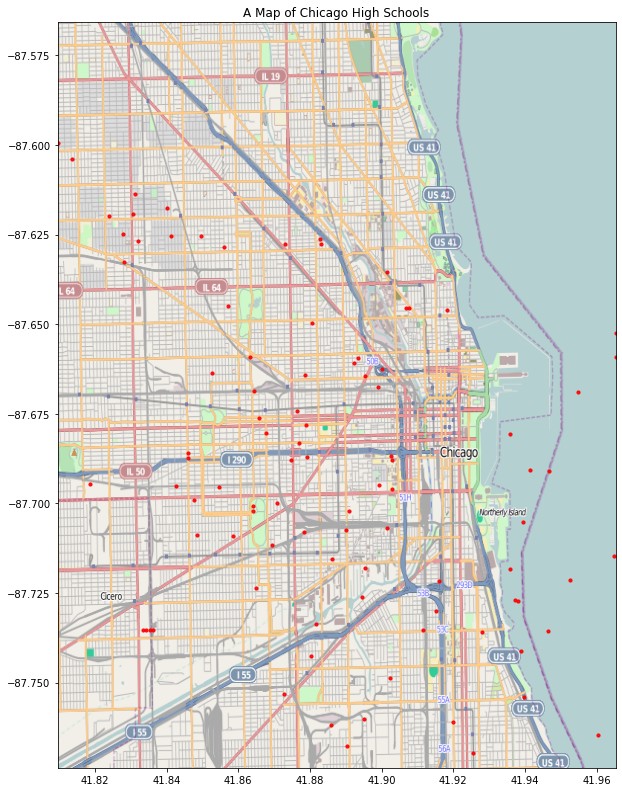

In [ ]:
coordinates = (41.8096, 41.9653, -87.7738, -87.5658)

fig, ax = plt.subplots(figsize = (10,16))

ax.scatter(data = hs_df, x = 'School_Latitude', y = 'School_Longitude', zorder = 1, alpha= .9, c='red', s=10)

ax.set_title('A Map of Chicago High Schools')
ax.set_xlim(41.8096, 41.9653)
ax.set_ylim(-87.7738, -87.5658)

ax.imshow(base_map, zorder = 0, extent = coordinates, aspect = 'equal')

it **kind** of worked. It didn't really do what I was hoping for. I will need to create a better image to use for this.

## School Types
The focus of this project will be to look at different performance gaps between school types. So, I'll take a look at what kinds of different schools CPS has. 

*What are the different types of schools the Chicago Public Schools has?*

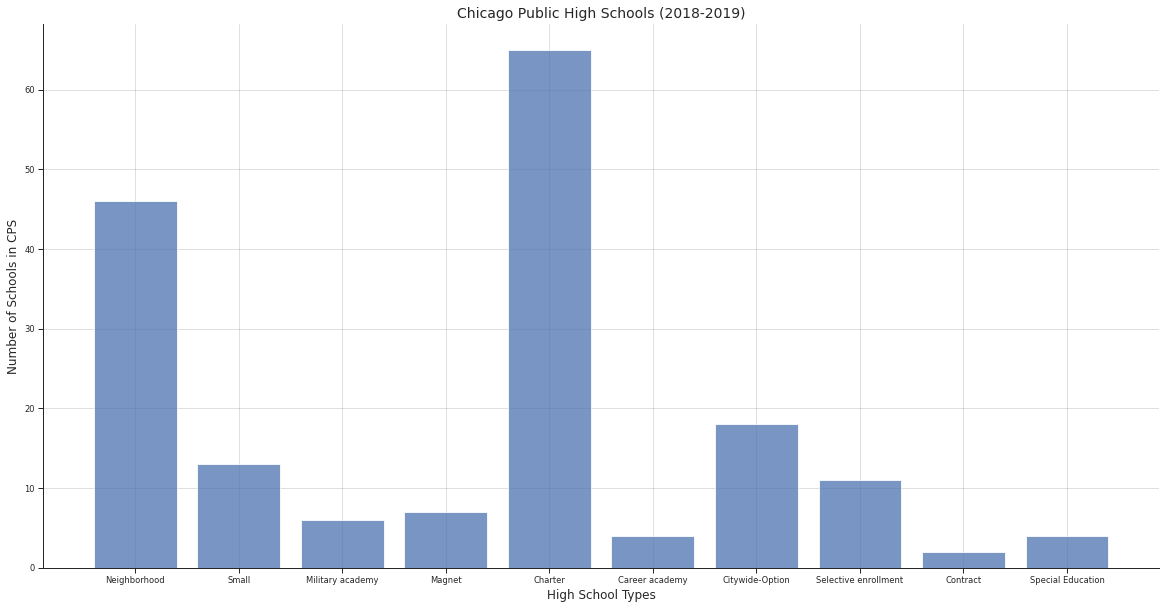

In [ ]:
#Histplot
fig, ax = plt.subplots(figsize=(20,10))

sns.histplot(data=hs_df, x='School_Type', shrink = .8)

#Labeling Graph
ax.set_title("Chicago Public High Schools (2018-2019)", size = 14)
ax.set_xlabel("High School Types", size = 12)
ax.set_ylabel("Number of Schools in CPS", size = 12)
ax.grid(color='gray', alpha = .5, linestyle='-', linewidth=.5)

sns.despine()
plt.show()

So, Chicago categorizes their high schools as 'Neighborhood', 'Small', 'Military academy', 'Magnet', 'Charter', 'Career academy', 'Citywide-Option', 'Selective enrollment', 'Contract', and 'Special Education'. 

Interestingly, most of the high schools in Chicago are charter schools, with contract schools being the least frequent.Charter schools and Neighborhood schools appear to be the most popular and attended options.


## Data Definitions of School Types

| Information | Description |
|------|-------|
| Neighborhood | Schools w/ attendance boundary (live w/i area)|
| Magnet | Schools that specialize in a specific subject. |
| Small | A small school (?) -- No definition |
| Military Academy | Military Model to Develop leadership/team |
| Charter | Open Schools, operated privately |
| Career Academy  | High schools w/ college + career prep focus|
| Citywide-Option  | A no-boundary school (anyone in city)|
| Selective Enrollment | Schools that req testing for entrance |
| Contract | "Turnaround" Schools, private |
| Special Ed |HS for students with disabilities

**I could not find a definition for 'small' HS, but I will assume it means a small school by population.**

Source: https://ncue.illinoisstate.edu/downloads/partners/Types%20of%20CPS%20schools.pdf

Looking through the columns, there are several that we do not need. 
- The School Survey doesn't really tell us much (only whether they took it)
- NWEA scores are only from grades in Elementary School, so I'll remove them as well
- 'ES' stands for Elementary School, so this is not a helpful item to look at

## Remove some elements that are not related to HS:
- remove NWEA Scores
- Remove anything "ES"

In [ ]:
#Let's remove all NWEA elements
hs_new_columns = []
hs_removed = []

for element in hs_df.columns:
    if ("NWEA" in element) or ("School_Survey" in element) or ("ES" in element):
        hs_removed.append(element)
    else:
        hs_new_columns.append(element)

In [ ]:
#How many columns are left?
len(hs_new_columns)

106

In [ ]:
#Are the new and old columns equal to the old columns?
len(hs_new_columns) + len(hs_removed) == len(hs_df.columns)

True

In [ ]:
show_all(hs_new_columns, 5)

School_ID, Short_Name, Long_Name, School_Type, Primary_Category, 
Address, City, State, Zip, Phone, 
Fax, CPS_School_Profile, Website, Progress_Report_Year, Blue_Ribbon_Award_Year, 
Excelerate_Award_Gold_Year, Spot_Light_Award_Year, Improvement_Award_Year, Excellence_Award_Year, Student_Growth_Rating, 
Student_Growth_Description, Student_Attainment_Rating, Student_Attainment_Description, Culture_Climate_Rating, Culture_Climate_Description, 
Healthy_School_Certification, Healthy_School_Certification_Description, Creative_School_Certification, Creative_School_Certification_Description, Suspensions_Per_100_Students_Year_1_Pct, 
Suspensions_Per_100_Students_Year_2_Pct, Suspensions_Per_100_Students_Avg_Pct, Misconducts_To_Suspensions_Year_1_Pct, Misconducts_To_Suspensions_Year_2_Pct, Misconducts_To_Suspensions_Avg_Pct, 
Average_Length_Suspension_Year_1_Pct, Average_Length_Suspension_Year_2_Pct, Average_Length_Suspension_Avg_Pct, Behavior_Discipline_Year_1, Behavior_Discipline_Year_2, 
Stude

In [ ]:
#Checking what we removed
show_all(hs_removed, 4)

Growth_Reading_Grades_Tested_Pct_ES, Growth_Reading_Grades_Tested_Label_ES, Growth_Math_Grades_Tested_Pct_ES, Growth_Math_Grades_Tested_Label_ES, 
Attainment_Reading_Pct_ES, Attainment_Reading_Lbl_ES, Attainment_Math_Pct_ES, Attainment_Math_Lbl_ES, 
School_Survey_Student_Response_Rate_Pct, School_Survey_Student_Response_Rate_Avg_Pct, School_Survey_Teacher_Response_Rate_Pct, School_Survey_Teacher_Response_Rate_Avg_Pct, 
School_Survey_Parent_Response_Rate_Pct, School_Survey_Parent_Response_Rate_Avg_Pct, NWEA_Reading_Growth_Grade_3_Pct, NWEA_Reading_Growth_Grade_3_Lbl, 
NWEA_Reading_Growth_Grade_4_Pct, NWEA_Reading_Growth_Grade_4_Lbl, NWEA_Reading_Growth_Grade_5_Pct, NWEA_Reading_Growth_Grade_5_Lbl, 
NWEA_Reading_Growth_Grade_6_Pct, NWEA_Reading_Growth_Grade_6_Lbl, NWEA_Reading_Growth_Grade_7_Pct, NWEA_Reading_Growth_Grade_7_Lbl, 
NWEA_Reading_Growth_Grade_8_Pct, NWEA_Reading_Growth_Grade_8_Lbl, NWEA_Math_Growth_Grade_3_Pct, NWEA_Math_Growth_Grade_3_Lbl, 
NWEA_Math_Growth_Grade_4_Pct, NWE

Let's put hs_new_columns into the hs to create a new dataframe. 

In [ ]:
len(hs_new_columns)

106

In [ ]:
#Create a new data frame from usable columns
hs_performance_df = hs_df[hs_new_columns]

In [ ]:
len(hs_performance_df)

176

In [ ]:
len(hs_performance_df.columns) == len(hs_new_columns)

True

Text(0.5, 1.0, 'Teacher Attendance at different school types, CPS 2018-2019')

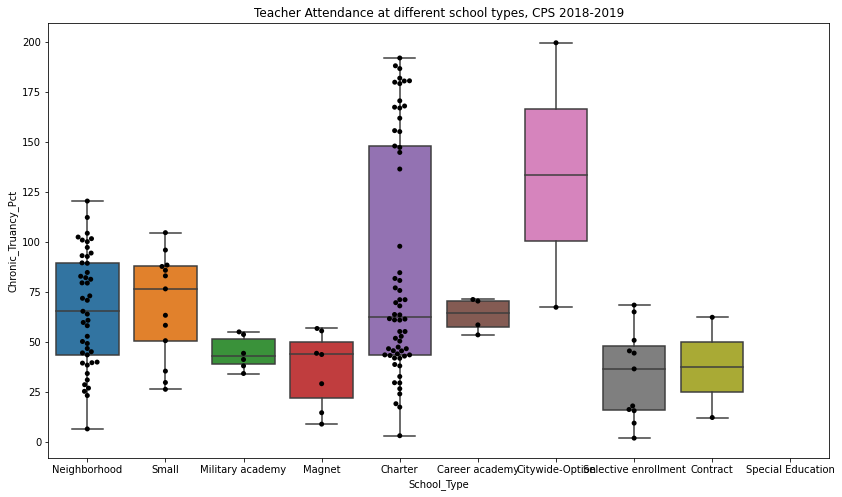

In [ ]:
# Let's swarmplot and boxplot to see how well teacher attendance is, per High School
fig, ax = plt.subplots(figsize = (14,8))
sns.swarmplot(x = hs_df.School_Type, y = hs_df.Chronic_Truancy_Pct, color = 'black')
sns.boxplot(x = hs_df.School_Type, y = hs_df.Chronic_Truancy_Pct)

plt.title("Teacher Attendance at different school types, CPS 2018-2019")

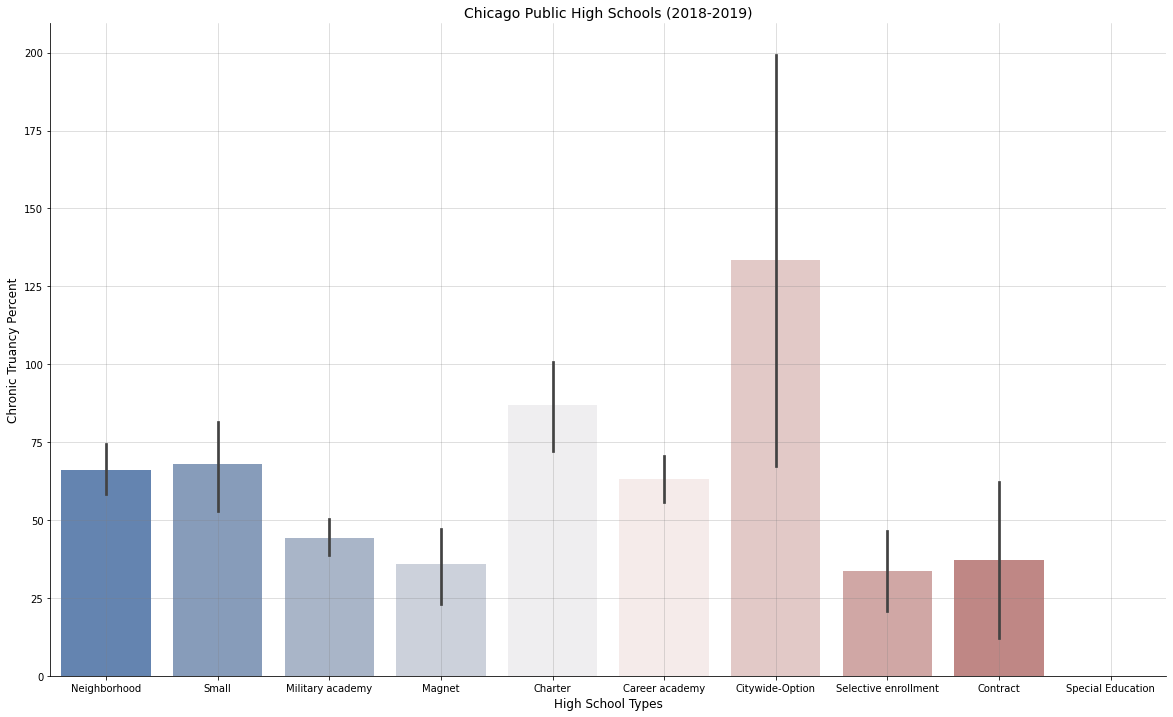

In [ ]:
#Histplot
fig, ax = plt.subplots(figsize=(20,12))

sns.barplot(data=hs_df, x='School_Type', y = 'Chronic_Truancy_Pct',  palette="vlag")

#Labeling Graph
ax.set_title("Chicago Public High Schools (2018-2019)", size = 14)
ax.set_xlabel("High School Types", size = 12)
ax.set_ylabel("Chronic Truancy Percent", size = 12)
ax.grid(color='gray', alpha = .5, linestyle='-', linewidth=.5)

sns.despine()
sns.set_style('ticks')
plt.show()

With Chronic Truancy obviously being a negative, Citywide-Option Schools appear to be far and away the worst choice.   
Unfortunately, there is no data on Special Education Schools.

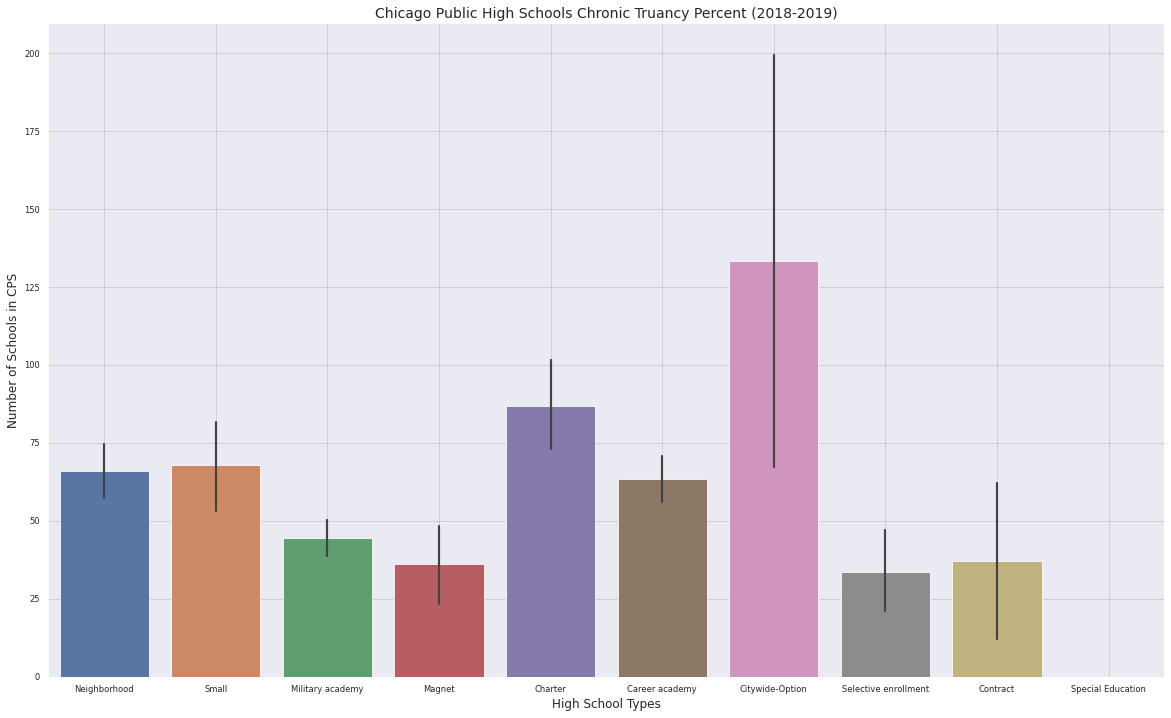

In [ ]:
#Let's choose some columns for
#Histplot
fig, ax = plt.subplots(figsize=(20,12))

sns.barplot(data=hs_df, x='School_Type', y = 'Chronic_Truancy_Pct')

#Labeling Graph
ax.set_title("Chicago Public High Schools Chronic Truancy Percent (2018-2019)", size = 14)
ax.set_xlabel("High School Types", size = 12)
ax.set_ylabel("Number of Schools in CPS", size = 12)
ax.grid(color='gray', alpha = .5, linestyle='-', linewidth=.5)

sns.despine()
sns.set_style('ticks')
plt.show()

Most of the schools are pretty similar. Charter schools look slightly worse than neighborhood schools in terms of Chronic Truancy, Citywide-Option Schools look the worst. A lot of this is likely due to the number of schools reporting in the data (citywide-option only have a few).

In [ ]:
#Let's choose some columns for
#Histplot
fig, ax = plt.subplots(figsize=(20,12))

sns.barplot(data=hs_df, x='School_Type', y = 'Chronic_Truancy_Pct')

#Labeling Graph
ax.set_title("Chicago Public High Schools Chronic Truancy Percent (2018-2019)", size = 14)
ax.set_xlabel("High School Types", size = 12)
ax.set_ylabel("Number of Schools in CPS", size = 12)
ax.grid(color='gray', alpha = .5, linestyle='-', linewidth=.5)

sns.despine()
sns.set_style('ticks')
plt.show()

Let's create a boxplot and swarmplot, to see where schools fall in the distribution.
Ref: https://medium.com/@harrison.hardin/swarm-plots-with-overlaid-box-plots-18c35912c049

In [ ]:
hs_perf_columns = hs_performance_df.columns

In [ ]:
for element in hs_df.columns:
    if ("NWEA" in element) or ("School_Survey" in element) or ("ES" in element):
        hs_removed.append(element)
    else:
        hs_new_columns.append(element)

In [ ]:
show_all(hs_perf_columns, 5)

School_ID, Short_Name, Long_Name, School_Type, Primary_Category, 
Address, City, State, Zip, Phone, 
Fax, CPS_School_Profile, Website, Progress_Report_Year, Blue_Ribbon_Award_Year, 
Excelerate_Award_Gold_Year, Spot_Light_Award_Year, Improvement_Award_Year, Excellence_Award_Year, Student_Growth_Rating, 
Student_Growth_Description, Student_Attainment_Rating, Student_Attainment_Description, Culture_Climate_Rating, Culture_Climate_Description, 
Healthy_School_Certification, Healthy_School_Certification_Description, Creative_School_Certification, Creative_School_Certification_Description, Suspensions_Per_100_Students_Year_1_Pct, 
Suspensions_Per_100_Students_Year_2_Pct, Suspensions_Per_100_Students_Avg_Pct, Misconducts_To_Suspensions_Year_1_Pct, Misconducts_To_Suspensions_Year_2_Pct, Misconducts_To_Suspensions_Avg_Pct, 
Average_Length_Suspension_Year_1_Pct, Average_Length_Suspension_Year_2_Pct, Average_Length_Suspension_Avg_Pct, Behavior_Discipline_Year_1, Behavior_Discipline_Year_2, 
Stude

## Let's focus on graduation rate, since this should be a good predictor for high schools.
- Take the HS dataframe, add the graduation information columns, and see what we see.

In [ ]:
grad_rate_columns = ['School_ID','Short_Name','Long_Name','School_Type']

for elem in hs_perf_columns:
    if "Graduation" in elem:
        grad_rate_columns.append(elem)

In [ ]:
#
hs_graduation = hs_df[grad_rate_columns]

In [ ]:
hs_graduation.head()

,School_ID,Short_Name,Long_Name,School_Type,Graduation_4_Year_School_Pct_Year_2,Graduation_4_Year_CPS_Pct_Year_2,Graduation_4_Year_School_Pct_Year_1,Graduation_4_Year_CPS_Pct_Year_1,Graduation_5_Year_School_Pct_Year_2,Graduation_5_Year_CPS_Pct_Year_2,Graduation_5_Year_School_Pct_Year_1,Graduation_5_Year_CPS_Pct_Year_1,Progress_Toward_Graduation_Year_1,Progress_Toward_Graduation_Year_2
0,"609,710",HARLAN HS,John M Harlan Community Academy High School,Neighborhood,56.1,75.6,62.1,74.7,65.7,78.2,57.4,77.5,"2,017","2,018"
2,"610,334",RABY HS,Al Raby High School,Small,68.5,75.6,58.8,74.7,73.1,78.2,67.5,77.5,"2,017","2,018"
9,"609,712",HIRSCH HS,Emil G Hirsch Metropolitan High School,Neighborhood,55.0,75.6,44.2,74.7,45.5,78.2,40.0,77.5,"2,017","2,018"
10,"610,543",SOLORIO HS,Eric Solorio Academy High School,Neighborhood,84.4,75.6,89.2,74.7,91.2,78.2,82.7,77.5,"2,017","2,018"
17,"610,389",ORR HS,Orr Academy High School,Neighborhood,30.3,75.6,34.6,74.7,38.3,78.2,46.4,77.5,"2,017","2,018"


In [ ]:
hs_graduation.describe()

,Graduation_4_Year_School_Pct_Year_2,Graduation_4_Year_CPS_Pct_Year_2,Graduation_4_Year_School_Pct_Year_1,Graduation_4_Year_CPS_Pct_Year_1,Graduation_5_Year_School_Pct_Year_2,Graduation_5_Year_CPS_Pct_Year_2,Graduation_5_Year_School_Pct_Year_1,Graduation_5_Year_CPS_Pct_Year_1
count,140.000000,1.720000e+02,134.000000,1.720000e+02,134.000000,1.720000e+02,120.00000,172.0
mean,69.865714,7.560000e+01,69.191791,7.470000e+01,72.825373,7.820000e+01,74.96250,77.5
std,23.868060,2.280375e-13,23.090710,1.852805e-13,22.883319,2.137852e-13,19.00475,0.0
min,0.000000,7.560000e+01,0.000000,7.470000e+01,0.000000,7.820000e+01,0.00000,77.5
25%,63.300000,7.560000e+01,61.125000,7.470000e+01,65.900000,7.820000e+01,67.15000,77.5
50%,75.750000,7.560000e+01,75.600000,7.470000e+01,80.650000,7.820000e+01,79.20000,77.5
75%,85.425000,7.560000e+01,84.850000,7.470000e+01,86.825000,7.820000e+01,86.55000,77.5
max,98.800000,7.560000e+01,97.600000,7.470000e+01,98.300000,7.820000e+01,98.50000,77.5


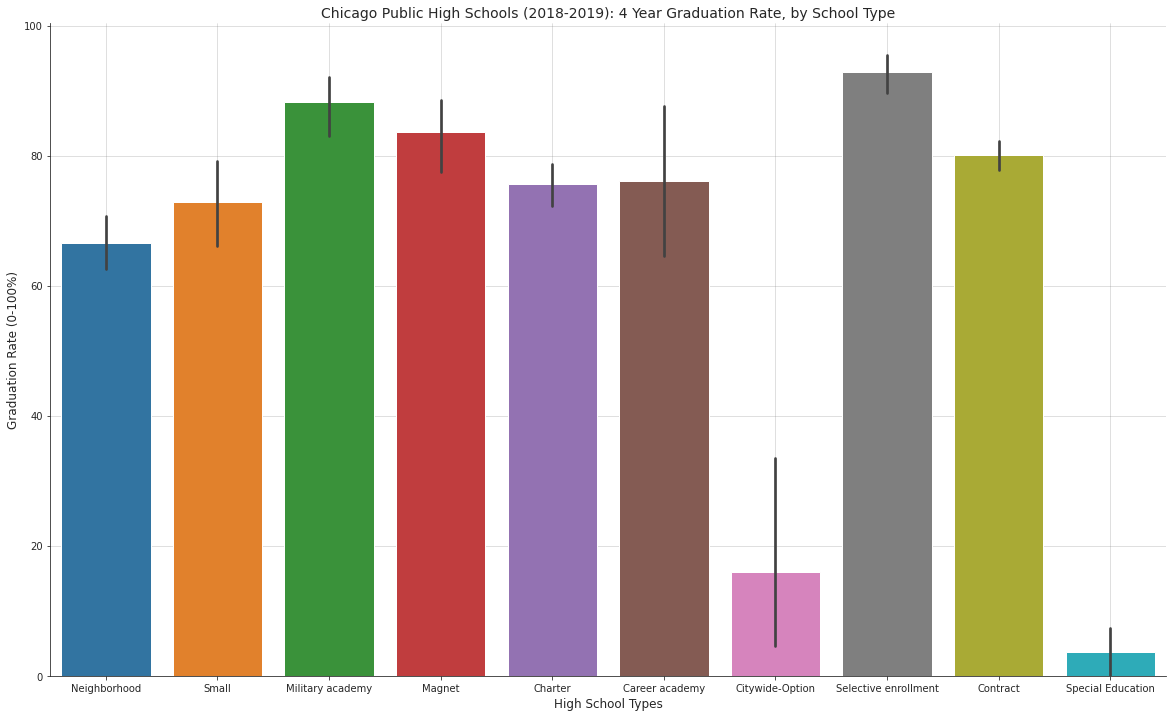

In [ ]:
#Let's choose some columns for
#Histplot
fig, ax = plt.subplots(figsize=(20,12))

sns.barplot(data=hs_df, x='School_Type', y = 'Graduation_4_Year_School_Pct_Year_1')

#Labeling Graph
ax.set_title("Chicago Public High Schools (2018-2019): 4 Year Graduation Rate, by School Type", size = 14)
ax.set_xlabel("High School Types", size = 12)
ax.set_ylabel("Graduation Rate (0-100%)", size = 12)
ax.grid(color='gray', alpha = .5, linestyle='-', linewidth=.5)

sns.despine()
sns.set_style('ticks')
plt.show()

In [ ]:
#sns.pairplot(hs_graduation)

## Proficiency Scores
How are students doing? Are they prepared for college?  
Let's take a look at SAT scores and College Readiness Scores here.


In [ ]:
base_columns = ['School_ID','Short_Name','Long_Name','School_Type']
sat_scores = [x for x in hs_performance_df.columns if "sat" in x.lower()]
hs_test_scores = hs_df[base_columns + sat_scores]

In [ ]:
hs_test_scores.head()

,School_ID,Short_Name,Long_Name,School_Type,PSAT_Grade_9_Score_School_Avg,PSAT_Grade_10_Score_School_Avg,SAT_Grade_11_Score_School_Avg,SAT_Grade_11_Score_CPS_Avg,Growth_PSAT_Grade_9_School_Pct,Growth_PSAT_Grade_9_School_Lbl,Growth_PSAT_Reading_Grade_10_School_Pct,Growth_PSAT_Reading_Grade_10_School_Lbl,Growth_SAT_Grade_11_School_Pct,Growth_SAT_Grade_11_School_Lbl,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_9_School_Lbl,Attainment_PSAT_Grade_10_School_Pct,Attainment_PSAT_Grade_10_School_Lbl,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Lbl,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Reading_Grade_11_School_Lbl,Growth_SAT_Math_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Lbl
0,"609,710",HARLAN HS,John M Harlan Community Academy High School,Neighborhood,701,733,824,969.0,2.0,2nd,32.0,32nd,9.0,9th,8.3,8.3,4.8,4.8,5.6,5.6,7.0,7th,50.0,50th,50.0,50th
2,"610,334",RABY HS,Al Raby High School,Small,685,756,814,969.0,1.0,1st,68.0,68th,3.0,3rd,4.8,4.8,0.0,0.0,3.5,3.5,16.0,16th,50.0,50th,63.0,63rd
9,"609,712",HIRSCH HS,Emil G Hirsch Metropolitan High School,Neighborhood,666,730,781,969.0,6.0,6th,82.0,82nd,NaN,NaN,3.3,3.3,0.0,0.0,2.9,2.9,2.0,2nd,36.0,36th,36.0,36th
10,"610,543",SOLORIO HS,Eric Solorio Academy High School,Neighborhood,889,940,"1,000",969.0,95.0,95th,70.0,70th,85.0,85th,57.6,57.6,58.5,58.5,49.8,49.8,50.0,50th,32.0,32nd,32.0,32nd
17,"610,389",ORR HS,Orr Academy High School,Neighborhood,694,754,801,969.0,8.0,8th,68.0,68th,11.0,11th,4.4,4.4,6.7,6.7,0.0,0.0,17.0,17th,50.0,50th,64.0,64th


In [ ]:
hs_test_scores.describe()

,SAT_Grade_11_Score_CPS_Avg,Growth_PSAT_Grade_9_School_Pct,Growth_PSAT_Reading_Grade_10_School_Pct,Growth_SAT_Grade_11_School_Pct,Attainment_PSAT_Grade_9_School_Pct,Attainment_PSAT_Grade_9_School_Lbl,Attainment_PSAT_Grade_10_School_Pct,Attainment_PSAT_Grade_10_School_Lbl,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Pct
count,172.0,130.000000,129.000000,124.000000,132.000000,132.000000,132.000000,132.000000,161.000000,161.000000,129.000000,132.000000,132.000000
mean,969.0,50.776923,72.232558,41.822581,33.840152,33.840152,33.396970,33.396970,23.472671,23.472671,30.503876,47.250000,54.757576
std,0.0,32.983027,17.416547,30.378921,25.094535,25.094535,26.195198,26.195198,24.666336,24.666336,20.079189,17.697792,17.214019
min,969.0,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16.000000,19.000000
25%,969.0,21.000000,66.000000,16.750000,14.100000,14.100000,11.525000,11.525000,5.100000,5.100000,16.000000,33.000000,38.000000
50%,969.0,51.500000,72.000000,36.500000,26.400000,26.400000,26.700000,26.700000,14.000000,14.000000,29.000000,50.000000,50.000000
75%,969.0,82.000000,83.000000,63.250000,48.700000,48.700000,50.100000,50.100000,36.600000,36.600000,34.000000,64.000000,64.000000
max,969.0,99.000000,99.000000,99.000000,100.000000,100.000000,100.000000,100.000000,99.500000,99.500000,95.000000,95.000000,96.000000


Unfortunately for looking at this data, a lot of these are based on year-to-year data, such as 'growth'. Let's just see how students are doing.

Having tried to visualize the data at first, I found that the data in the columns for PSAT avg are a mixture of string and float:

ref: https://www.geeksforgeeks.org/creating-a-pandas-series-from-lists/

In [ ]:
#Let's take a look at the data types within the column here.
data_types = []

for i in hs_test_scores.PSAT_Grade_9_Score_School_Avg:
    data_types.append(type(i))

#
pd.Series(data_types).value_counts()

<class 'str'>      132
<class 'float'>     44
dtype: int64

STR replace on series  
ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html

In [ ]:
hs_test_scores['PSAT_Grade_9_Score_School_Avg'] = pd.Series(hs_test_scores.PSAT_Grade_9_Score_School_Avg).str.replace(',', '', regex=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
show_all(hs_test_scores['PSAT_Grade_9_Score_School_Avg'],30)

701, 685, 666, 889, 694, 814, 885, 822, 851, 904, 743, 726, nan, 856, 662, nan, 849, 762, 885, 735, nan, 811, 735, 740, 799, 869, 818, nan, nan, nan, 
726, 727, 818, nan, 1205, 876, nan, 740, 794, 804, nan, 706, 845, nan, 777, 714, 737, nan, 686, nan, 820, nan, nan, nan, nan, 773, 897, 721, 769, 812, 
nan, nan, nan, nan, 717, nan, 727, nan, nan, 823, 741, 705, 749, 790, 836, 756, 889, 853, 703, 811, 742, 977, 764, 1190, 767, 756, 936, nan, 741, 885, 
719, 783, 1140, 896, nan, nan, 723, nan, 790, 1108, 824, nan, 757, 800, 708, 878, 907, 802, 966, 843, nan, 746, nan, 931, nan, 762, nan, 702, 620, 717, 
782, nan, 744, nan, nan, 829, 686, 744, 775, 706, nan, 784, 842, 699, 765, 713, nan, 733, 781, 934, 784, 703, 764, 802, 904, 868, 919, 859, 726, 783, 
903, 890, 774, 753, 886, 865, 811, 870, 842, 883, 682, 809, 912, nan, 993, 966, 757, nan, 1164, nan, nan, 792, nan, 698, nan, nan, 

In [ ]:
hs_test_scores['PSAT_Grade_9_Score_School_Avg'] = [float(elem) for elem in hs_test_scores['PSAT_Grade_9_Score_School_Avg']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def show_data_types(dataframe_series):
    #Let's take a look at the data types within the column here.
    data_types = []

    for i in dataframe_series:
        data_types.append(type(i))

    #
    return pd.Series(data_types).value_counts()

In [ ]:
show_data_types(hs_test_scores.PSAT_Grade_9_Score_School_Avg)

<class 'float'>    176
dtype: int64

Text(0, 0.5, '2018-2019 Average SAT Scores')

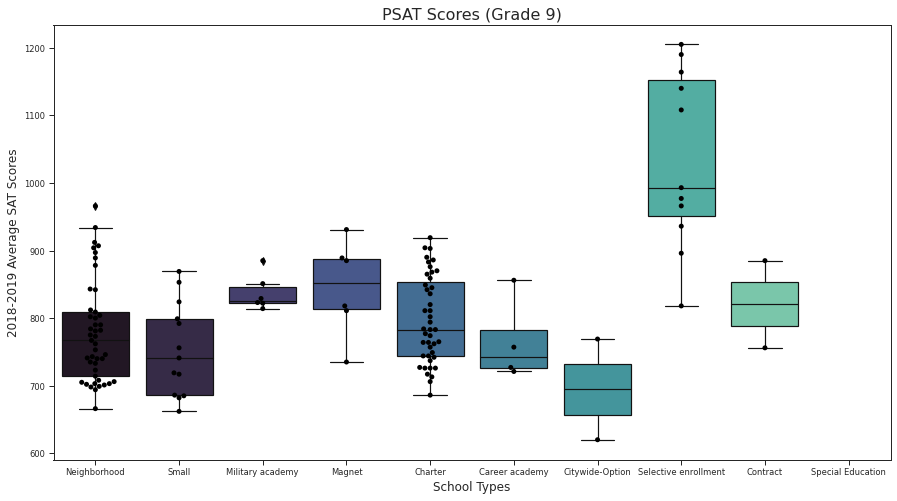

In [ ]:
# Let's swarmplot and boxplot to see how well teacher attendance is, per High School
sns.set_context("paper", font_scale=0.95)

fig, ax = plt.subplots(figsize = (15,8))
sns.swarmplot(x = hs_test_scores.School_Type, y = hs_test_scores.PSAT_Grade_9_Score_School_Avg, color = 'black')
sns.boxplot(x = hs_test_scores.School_Type, y = hs_test_scores.PSAT_Grade_9_Score_School_Avg, palette = 'mako')

ax.set_title("PSAT Scores (Grade 9)", size = 16)
ax.set_xlabel("School Types", size = 12)
ax.set_ylabel("2018-2019 Average SAT Scores", size= 12)

In [ ]:
 hs_test_scores.PSAT_Grade_9_Score_School_Avg.describe()

count     132.000000
mean      808.386364
std       103.701542
min       620.000000
25%       736.500000
50%       787.000000
75%       865.750000
max      1205.000000
Name: PSAT_Grade_9_Score_School_Avg, dtype: float64

- Selective enrollment schools appear to do way better than other types of schools. Charter and Neighborhood schools appear to do about equally, which is positive. 
- There isn't much data from contract or city-wide options. 
- Magnet Schools are slightly higher than other types of schools. 

In [ ]:
#And for 10th grade test scores
hs_test_scores['PSAT_Grade_10_Score_School_Avg'] = pd.Series(hs_test_scores.PSAT_Grade_10_Score_School_Avg).str.replace(',', '', regex=True)
hs_test_scores['PSAT_Grade_10_Score_School_Avg'] = [float(elem) for elem in hs_test_scores['PSAT_Grade_10_Score_School_Avg']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Did they convert correctly?
show_data_types(hs_test_scores.PSAT_Grade_10_Score_School_Avg)

<class 'float'>    176
dtype: int64

Text(0, 0.5, '2018-2019 Average SAT Scores')

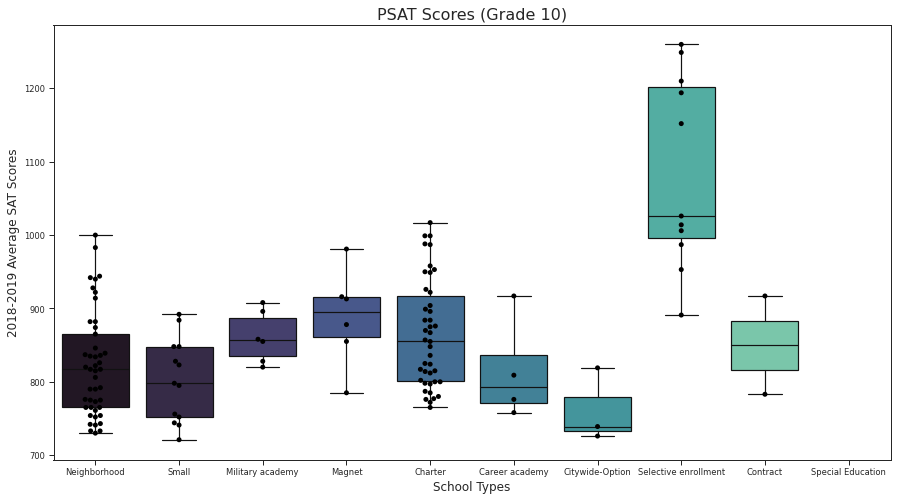

In [ ]:
# Let's swarmplot and boxplot to see how well teacher attendance is, per High School
sns.set_context("paper", font_scale=0.95)

fig, ax = plt.subplots(figsize = (15,8))
sns.swarmplot(x = hs_test_scores.School_Type, y = hs_test_scores.PSAT_Grade_10_Score_School_Avg, color = 'black')
sns.boxplot(x = hs_test_scores.School_Type, y = hs_test_scores.PSAT_Grade_10_Score_School_Avg, palette = 'mako')

ax.set_title("PSAT Scores (Grade 10)", size = 16)
ax.set_xlabel("School Types", size = 12)
ax.set_ylabel("2018-2019 Average SAT Scores", size= 12)

Similar trends to Grade 9 students. Charter Schools have a slight advantage on Neighborhood schools.

In [ ]:
show_data_types(hs_test_scores.SAT_Grade_11_Score_School_Avg)

<class 'str'>      161
<class 'float'>     15
dtype: int64

## How about Teacher Quality?
There isn't much to look off, except for 1y, 2y, and average teacher attendance per schools.  
But naturally, teachers who average higher attendance would suggest a greater buy-in at the school.

In [ ]:
#The HS performance test scores
hs_perf_columns

Index(['School_ID', 'Short_Name', 'Long_Name', 'School_Type',
       'Primary_Category', 'Address', 'City', 'State', 'Zip', 'Phone',
       ...
       'Attainment_SAT_Grade_11_School_Pct',
       'Attainment_SAT_Grade_11_School_Lbl',
       'Attainment_All_Grades_School_Pct', 'Attainment_All_Grades_School_Lbl',
       'Growth_PSAT_Math_Grade_10_School_Pct',
       'Growth_PSAT_Math_Grade_10_School_Lbl',
       'Growth_SAT_Reading_Grade_11_School_Pct',
       'Growth_SAT_Reading_Grade_11_School_Lbl',
       'Growth_SAT_Math_Grade_11_School_Pct',
       'Growth_SAT_Math_Grade_11_School_Lbl'],
      dtype='object', length=106)

In [ ]:
base_columns = ['School_ID','Short_Name','Long_Name','School_Type']

for element in hs_perf_columns:
    if "Teacher" in element:
        base_columns.append(elem)

In [ ]:
base_columns

['School_ID',
 'Short_Name',
 'Long_Name',
 'School_Type',
 'Growth_SAT_Math_Grade_11_School_Lbl',
 'Growth_SAT_Math_Grade_11_School_Lbl',
 'Growth_SAT_Math_Grade_11_School_Lbl']

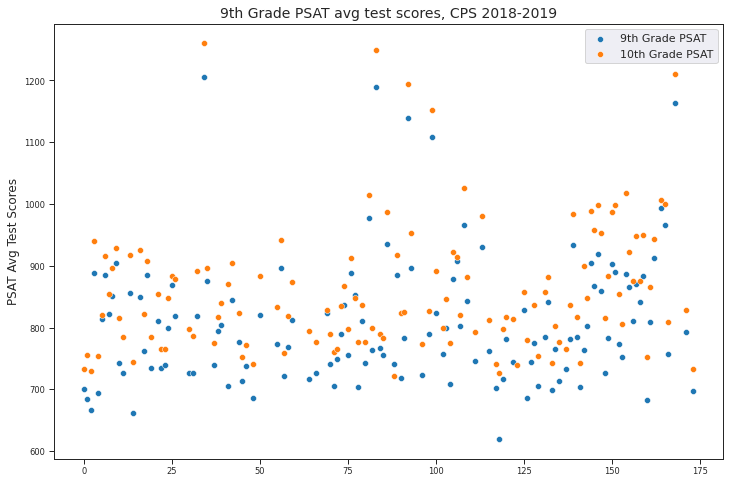

In [ ]:
#Visualizing All Scores
fig, ax = plt.subplots(figsize = (12,8))

sns.set_theme()
sns.scatterplot(data = hs_test_scores, x = range(0,len(hs_test_scores)), y = 'PSAT_Grade_9_Score_School_Avg', label = '9th Grade PSAT')
sns.scatterplot(data = hs_test_scores, x = range(0,len(hs_test_scores)), y = 'PSAT_Grade_10_Score_School_Avg', label = '10th Grade PSAT')

ax.set_title("9th Grade PSAT avg test scores, CPS 2018-2019", size = 14)
ax.set_ylabel("PSAT Avg Test Scores", size= 12)
ax.set_label('r')

## Teacher Quality/Participation:
Ref: https://stackoverflow.com/questions/36220829/fine-control-over-the-font-size-in-seaborn-plots-for-academic-papers

What is the buy-in for teachers in schools? Are teachers participatants in student's education? Are they often there, or are there

In [ ]:
teacher_quality = [x for x in hs_df.columns if "teacher_att" in x.lower()]

In [ ]:
teacher_quality

['Teacher_Attendance_Year_1_Pct',
 'Teacher_Attendance_Year_2_Pct',
 'Teacher_Attendance_Avg_Pct']

In [ ]:
grad_rate_columns = ['School_ID','Short_Name','Long_Name','School_Type']
teach_quality_df = hs_df[grad_rate_columns + teacher_quality]

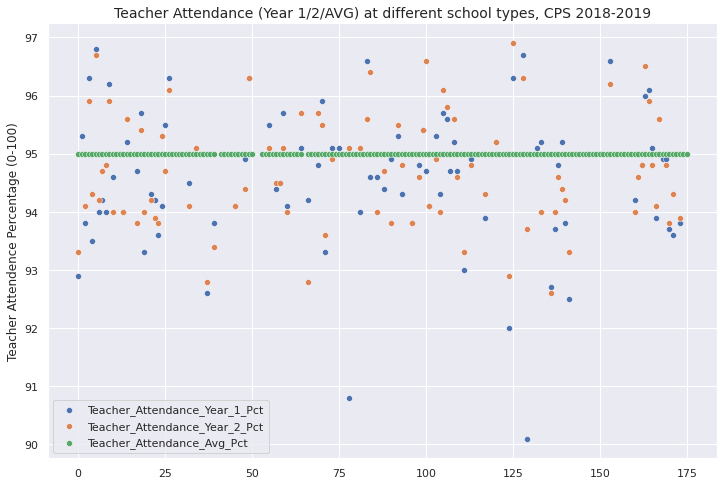

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))

sns.set_theme()

for elem in teacher_quality:
    sns.scatterplot(x = range(0,len(teach_quality_df)), y = teach_quality_df[elem], label = elem)

ax.set_title("Teacher Attendance (Year 1/2/AVG) at different school types, CPS 2018-2019", size = 14)
ax.set_ylabel("Teacher Attendence Percentage (0-100)", size= 12)
ax.set_label('r')

Looks like data points are all over the place, but there is a problem with 'Teacher_Attendance_Avg_Pct'. 

Text(0, 0.5, 'Teacher Attendence Percentage (0-100)')

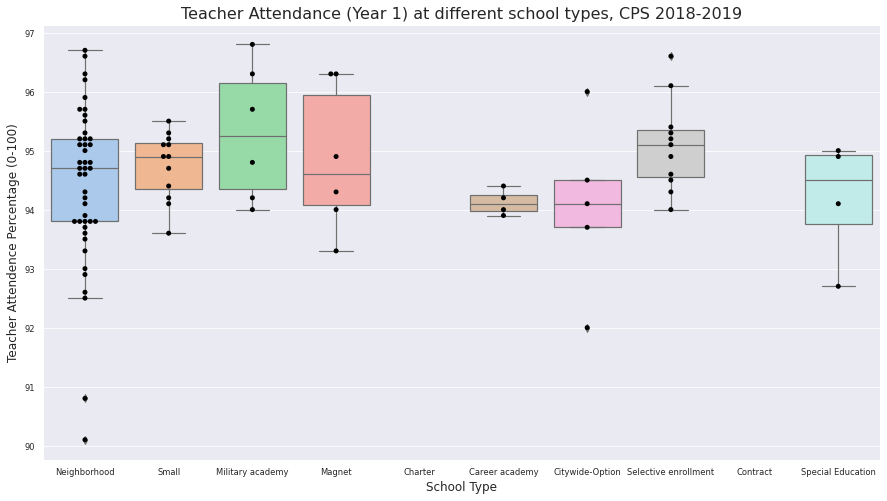

In [ ]:
# Let's swarmplot and boxplot to see how well teacher attendance is, per High School
sns.set_context("paper", font_scale=0.95)

fig, ax = plt.subplots(figsize = (15,8))
sns.swarmplot(x = teach_quality_df.School_Type, y = teach_quality_df.Teacher_Attendance_Year_1_Pct, color = 'black')
sns.boxplot(x = teach_quality_df.School_Type, y = teach_quality_df.Teacher_Attendance_Year_1_Pct, palette = 'pastel')

ax.set_title("Teacher Attendance (Year 1) at different school types, CPS 2018-2019", size = 16)
ax.set_xlabel("School Type", size = 12)
ax.set_ylabel("Teacher Attendence Percentage (0-100)", size= 12)

As it stands, Military Academy Schools appear to be the best kind of school if you are expecting a teacher to be with a student on any given day. Neighborhood schools are well-represented, and have a large range. None of the schools for 2nd year teachers is less than ~90%.

A few outlier neighborhood schools appear to only have average teacher attendance around 90%.

Text(0, 0.5, 'Teacher Attendence Percentage (0-100)')

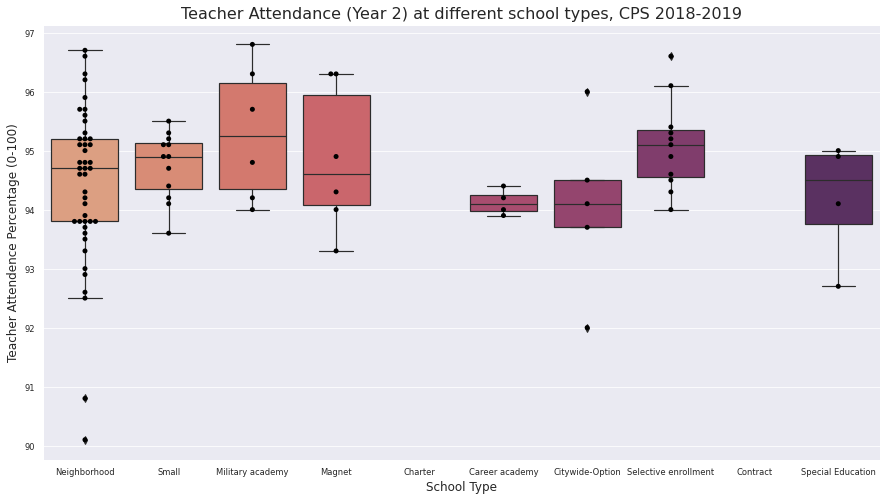

In [ ]:
# Let's swarmplot and boxplot to see how well teacher attendance is, per High School
fig, ax = plt.subplots(figsize = (15,8))
sns.swarmplot(x = teach_quality_df.School_Type, y = teach_quality_df.Teacher_Attendance_Year_1_Pct, color = 'black')
sns.boxplot(x = teach_quality_df.School_Type, y = teach_quality_df.Teacher_Attendance_Year_1_Pct, palette = "flare")

ax.set_title("Teacher Attendance (Year 2) at different school types, CPS 2018-2019", size = 16)
ax.set_xlabel("School Type", size = 12)
ax.set_ylabel("Teacher Attendence Percentage (0-100)", size= 12)

It's a little concerning that Charter Schools do not have to report their data. It's difficult to know here how they would compare, and we don't really have a way of looking at what they have. 
  
As it stands, Military Academy Schools appear to be the best kind of school if you are expecting a teacher to be with a student on any given day. Neighborhood schools are well-represented, and have a large range. None of the schools for 2nd year teachers is less than ~92%.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Teacher Attendance at different school types, CPS 2018-2019')

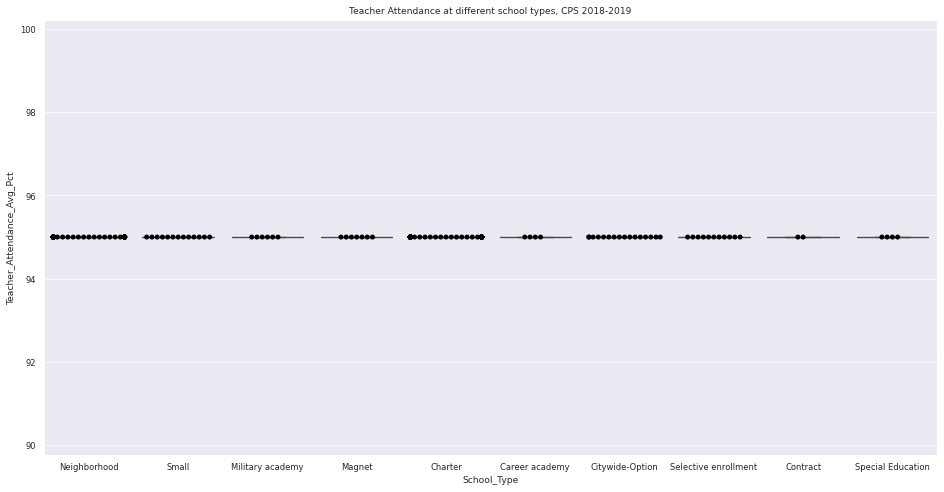

In [ ]:
# Let's swarmplot and boxplot to see how well teacher attendance is, per High School
fig, ax = plt.subplots(figsize = (16,8))
sns.swarmplot(x = teach_quality_df.School_Type, y = teach_quality_df.Teacher_Attendance_Avg_Pct, color = 'black')
sns.boxplot(x = teach_quality_df.School_Type, y = teach_quality_df.Teacher_Attendance_Avg_Pct)

ax.set_title("Teacher Attendance at different school types, CPS 2018-2019")

That wasn't too helpful. It looks like all of the data for 'Teacher_Attendance_Avg_Pct' is 95... which can't be right.
Using describe, all values over the schools are the same (0).

## School Safety

In [ ]:
hs_negative_df = hs_df[["School_ID", 
                  "Short_Name", 
                  "Long_Name", 
                  "School_Type",
                  "Student_Attendance_Year_1_Pct", 
                  "Suspensions_Per_100_Students_Avg_Pct", 
                  "Suspensions_Per_100_Students_Year_1_Pct", 
                  "Chronic_Truancy_Pct"
                  ]]
negative_df

In [ ]:
show_all(hs_df.columns, 8)

School_ID, Short_Name, Long_Name, School_Type, Primary_Category, Address, City, State, 
Zip, Phone, Fax, CPS_School_Profile, Website, Progress_Report_Year, Blue_Ribbon_Award_Year, Excelerate_Award_Gold_Year, 
Spot_Light_Award_Year, Improvement_Award_Year, Excellence_Award_Year, Student_Growth_Rating, Student_Growth_Description, Growth_Reading_Grades_Tested_Pct_ES, Growth_Reading_Grades_Tested_Label_ES, Growth_Math_Grades_Tested_Pct_ES, 
Growth_Math_Grades_Tested_Label_ES, Student_Attainment_Rating, Student_Attainment_Description, Attainment_Reading_Pct_ES, Attainment_Reading_Lbl_ES, Attainment_Math_Pct_ES, Attainment_Math_Lbl_ES, Culture_Climate_Rating, 
Culture_Climate_Description, School_Survey_Student_Response_Rate_Pct, School_Survey_Student_Response_Rate_Avg_Pct, School_Survey_Teacher_Response_Rate_Pct, School_Survey_Teacher_Response_Rate_Avg_Pct, School_Survey_Parent_Response_Rate_Pct, School_Survey_Parent_Response_Rate_Avg_Pct, Healthy_School_Certification, 
Healthy_School_Certif

In [ ]:
suspen_list = ['School_ID','Short_Name','Long_Name','School_Type']

for element in hs_df:
    if ("suspension" in element.lower()) or ("safety" in element.lower()):
        suspen_list.append(element)

In [ ]:
suspen_df = hs_df[suspen_list]

In [ ]:
suspen_df.groupby('School_Type').describe()

Suspensions_Per_100_Students_Year_1_Pct  ... Misconducts_To_Suspensions_Avg_Pct
                                                       count  ...                                max
School_Type                                                   ...                                   
Career academy                                           4.0  ...                               13.5
Charter                                                  1.0  ...                               13.5
Citywide-Option                                          9.0  ...                               13.5
Contract                                                 2.0  ...                               13.5
Magnet                                                   7.0  ...                               13.5
Military academy                                         6.0  ...                               13.5
Neighborhood                                            45.0  ...                               13.5
Selective enrollment                                    11.0  ...                               13.5
Small                                                   13.0  ...                               13.5
Special Education                                        4.0  ...                               13.5

[10 rows x 48 columns]

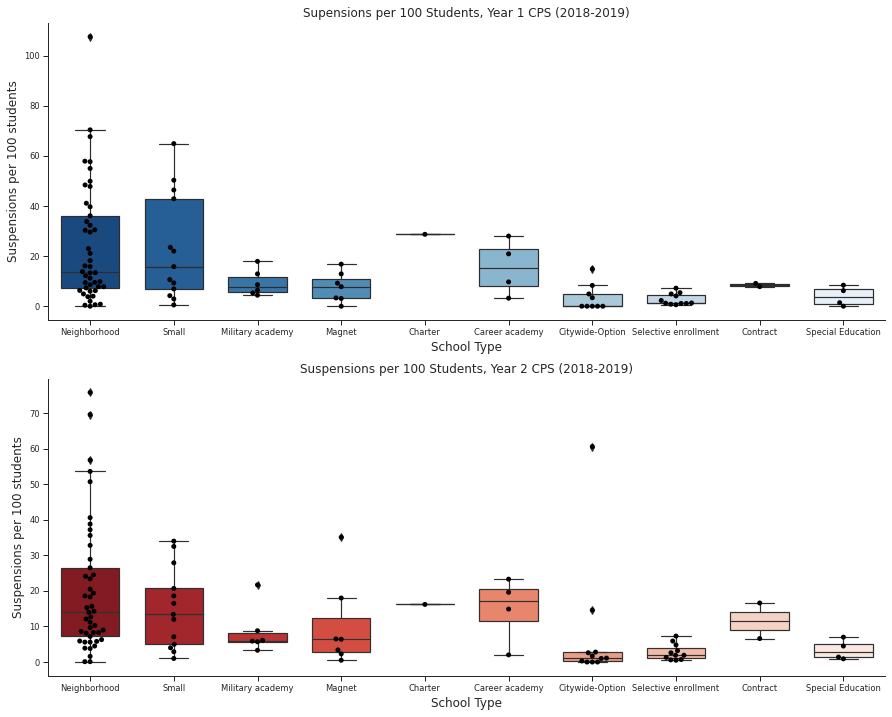

In [ ]:
# Let's swarmplot and boxplot to see how well teacher attendance is, per High School
fig, ax = plt.subplots(2, figsize = (15,12))

sns.set_style()
sns.swarmplot(x = suspen_df.School_Type, y = suspen_df.Suspensions_Per_100_Students_Year_1_Pct, color = 'black', ax=ax[0])
sns.boxplot(x = suspen_df.School_Type, y = suspen_df.Suspensions_Per_100_Students_Year_1_Pct, palette = "Blues_r", width = .7,  ax=ax[0])
sns.swarmplot(x = suspen_df.School_Type, y = suspen_df.Suspensions_Per_100_Students_Year_2_Pct, color = 'black', ax = ax[1])
sns.boxplot(x = suspen_df.School_Type, y = suspen_df.Suspensions_Per_100_Students_Year_2_Pct, palette = "Reds_r", width = .7, ax = ax[1])
sns.despine()

names = ["Supensions per 100 Students, Year 1", "Suspensions per 100 Students, Year 2"]

for i in range(0,2):
    ax[i].set_title(f"{names[i]} CPS (2018-2019)", size = 12)
    ax[i].set_xlabel("School Type", size = 12)
    ax[i].set_ylabel("Suspensions per 100 students", size= 12)
    

Notes:  
- Most of the schools are grouped reasonably together, but a few of the neighbrohood schools and citywide-option schools have *very* high suspension rates, at 1st year students having over 100 suspensions per 100 students (each student must average at least one suspension?)
- This is similarly seen in the 2y suspension percentages. Citywide option schools have one school that is a significant outlier. Neighborhood schools have a few. 
- If you don't want to risk the chance at a suspension, your best bet is probably a Military academy, citywide, magnet or selective enrollment school.

Obviously, there is something a little weird about the Neighborhood data too. How can 

# Conclusion
What I learned with this project: